In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r"data\\190819_file24_concat.csv", index_col=0, header=None).T

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
1,0.296508,0.431993,0.329875,0.329262,0.313243,0.300434,0.310191,0.334434,0.358874,0.377755,...,-0.132274,-0.126352,-0.164520,-0.144568,-0.160394,-0.158001,-0.137934,-0.151954,-0.106800,-0.113254
2,-0.491238,-0.303480,-0.237546,-0.182344,-0.115005,-0.043841,0.012246,0.008646,0.055190,0.029882,...,-0.272702,-0.271406,-0.301274,-0.305918,-0.284776,-0.302474,-0.280474,-0.305179,-0.272161,-0.261600
3,-0.356916,-0.210573,-0.189948,-0.146712,-0.132396,-0.137262,-0.124111,-0.141096,-0.128547,-0.142951,...,-0.158225,-0.163993,-0.174008,-0.149095,-0.172899,-0.153569,-0.180166,-0.217366,-0.196468,-0.162200
4,-0.581451,-0.325331,-0.263738,-0.192541,-0.152212,-0.110454,-0.095994,-0.048779,-0.029438,-0.031285,...,-0.318650,-0.306391,-0.321976,-0.310384,-0.335079,-0.342648,-0.322169,-0.331147,-0.318088,-0.287726
5,-0.406185,0.049042,0.223303,0.310755,0.273653,0.322463,0.270237,0.289675,0.217254,0.223146,...,-0.087267,-0.102270,-0.088442,-0.120767,-0.097628,-0.099681,-0.109340,-0.100381,-0.112223,-0.146520
6,-0.491532,-0.242878,-0.172337,-0.046181,-0.022043,0.008252,-0.002097,0.047246,0.073609,0.025948,...,-0.147970,-0.121380,-0.139929,-0.118718,-0.153542,-0.143904,-0.091643,-0.125647,-0.102496,-0.104305
7,-0.712955,-0.395644,-0.257366,-0.176899,-0.058378,0.029430,0.097120,0.162038,0.212004,0.181956,...,-0.163295,-0.204561,-0.243606,-0.232796,-0.233837,-0.235268,-0.229560,-0.227804,-0.208095,-0.210606
8,-0.508001,-0.175635,-0.104859,-0.063473,-0.038040,-0.038478,-0.044894,-0.021612,-0.026005,-0.034017,...,-0.087562,-0.110684,-0.132727,-0.093640,-0.131504,-0.135890,-0.120205,-0.144377,-0.095987,-0.111213
9,-0.474422,-0.267464,-0.289981,-0.203153,-0.206636,-0.184895,-0.130857,-0.138437,-0.116137,-0.172102,...,-0.144269,-0.138267,-0.115335,-0.095760,-0.114834,-0.185995,-0.147181,-0.152166,-0.139313,-0.146945
10,-0.405779,-0.097706,-0.076881,-0.084713,-0.039811,-0.079621,-0.112943,-0.095134,-0.036978,-0.098834,...,-0.069992,-0.083283,-0.143760,-0.118643,-0.134014,-0.098957,-0.115319,-0.125815,-0.138462,-0.127641


In [4]:
norm_df = pd.DataFrame(StandardScaler().fit_transform(df.loc[:, list(df)].values))
norm_df

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,0.650698,0.986037,1.074556,1.393842,1.589695,1.810823,2.143451,2.308003,2.607539,3.103717,...,-0.557044,-0.452761,-0.700276,-0.595803,-0.654776,-0.648537,-0.498962,-0.648298,-0.363348,-0.413223
1,-0.942644,-0.897652,-0.904820,-0.936600,-0.667096,-0.276237,0.071690,0.052393,0.334721,0.309642,...,-1.885192,-1.699810,-1.949122,-1.947200,-1.731354,-1.974596,-1.754031,-2.001984,-1.870396,-1.920266
2,-0.670956,-0.659699,-0.738779,-0.774290,-0.758742,-0.842571,-0.876463,-0.984349,-1.040396,-1.078531,...,-0.802479,-0.776368,-0.786921,-0.633720,-0.763012,-0.607859,-0.870816,-1.226190,-1.180554,-0.910466
3,-1.125113,-0.953617,-0.996188,-0.983046,-0.863169,-0.680053,-0.680955,-0.345192,-0.298651,-0.181641,...,-2.319761,-2.000583,-2.138171,-1.984600,-2.166753,-2.343339,-2.121156,-2.231397,-2.288952,-2.185673
4,-0.770610,0.005226,0.702795,1.309538,1.381061,1.944362,1.865633,1.998111,1.547632,1.861912,...,-0.131372,-0.245721,-0.005531,-0.396454,-0.111505,-0.113245,-0.247196,-0.192674,-0.412778,-0.751177
5,-0.943239,-0.742439,-0.677346,-0.316356,-0.177202,0.039564,-0.028040,0.319643,0.472574,0.278042,...,-0.705492,-0.410019,-0.475717,-0.379293,-0.595468,-0.519148,-0.091371,-0.415889,-0.324129,-0.322319
6,-1.391103,-1.133700,-0.973957,-0.911798,-0.368679,0.167945,0.661864,1.114413,1.508343,1.531079,...,-0.850433,-1.125134,-1.422492,-1.334759,-1.290456,-1.357739,-1.305735,-1.318402,-1.286520,-1.402221
7,-0.976551,-0.570216,-0.441956,-0.395125,-0.261503,-0.243721,-0.325629,-0.157098,-0.272957,-0.203583,...,-0.134163,-0.318061,-0.409947,-0.169247,-0.404715,-0.445591,-0.342866,-0.581359,-0.264804,-0.392488
8,-0.908630,-0.805408,-1.087732,-1.031385,-1.149975,-1.131330,-0.923374,-0.965945,-0.947515,-1.312669,...,-0.670485,-0.555192,-0.251124,-0.187010,-0.260430,-0.905489,-0.580389,-0.650175,-0.659666,-0.755494
9,-0.769790,-0.370625,-0.344358,-0.491875,-0.270836,-0.493139,-0.798807,-0.666131,-0.355075,-0.724188,...,0.032015,-0.082488,-0.510697,-0.378666,-0.426440,-0.106604,-0.299844,-0.417375,-0.651908,-0.559386


In [5]:
norm_df[0].mean()

3.0958142032816866e-17

In [6]:
norm_df.T

,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,0.650698,-0.942644,-0.670956,-1.125113,-0.770610,-0.943239,-1.391103,-0.976551,-0.908630,-0.769790,...,-0.195343,-0.596413,1.427123,1.641833,0.347347,-0.736909,-0.758954,0.551318,0.057068,0.350074
1,0.986037,-0.897652,-0.659699,-0.953617,0.005226,-0.742439,-1.133700,-0.570216,-0.805408,-0.370625,...,-0.322604,-0.833727,1.096366,0.822917,0.839557,-0.926786,-0.979901,0.298980,-0.018395,0.248667
2,1.074556,-0.904820,-0.738779,-0.996188,0.702795,-0.677346,-0.973957,-0.441956,-1.087732,-0.344358,...,-0.226450,-0.940050,1.028721,0.733188,1.230020,-1.042084,-1.043989,0.758008,-0.047261,0.597522
3,1.393842,-0.936600,-0.774290,-0.983046,1.309538,-0.316356,-0.911798,-0.395125,-1.031385,-0.491875,...,-0.194322,-1.054909,0.762335,0.343790,1.503208,-1.150745,-1.103606,0.461621,0.237177,0.479905
4,1.589695,-0.667096,-0.758742,-0.863169,1.381061,-0.177202,-0.368679,-0.261503,-1.149975,-0.270836,...,-0.215388,-1.275447,0.271544,0.077587,1.595077,-1.134554,-1.028091,0.608963,-0.140535,0.550770
5,1.810823,-0.276237,-0.842571,-0.680053,1.944362,0.039564,0.167945,-0.243721,-1.131330,-0.493139,...,-0.055480,-1.070817,-0.014386,-0.061897,1.956539,-1.230059,-0.794717,0.652355,-0.001611,1.143235
6,2.143451,0.071690,-0.876463,-0.680955,1.865633,-0.028040,0.661864,-0.325629,-0.923374,-0.798807,...,-0.040932,-1.179114,-0.029025,-0.424976,1.750098,-0.910446,-0.645839,0.759320,0.162960,0.986600
7,2.308003,0.052393,-0.984349,-0.345192,1.998111,0.319643,1.114413,-0.157098,-0.965945,-0.666131,...,-0.057699,-1.148411,-0.097990,-0.280018,1.483744,-0.847204,-0.562670,0.884371,-0.226298,1.277013
8,2.607539,0.334721,-1.040396,-0.298651,1.547632,0.472574,1.508343,-0.272957,-0.947515,-0.355075,...,0.013708,-1.198443,-0.019967,-0.451759,1.716613,-0.833435,-0.588744,0.304899,0.021662,1.073518
9,3.103717,0.309642,-1.078531,-0.181641,1.861912,0.278042,1.531079,-0.203583,-1.312669,-0.724188,...,0.069219,-1.114494,-0.264781,-0.248767,0.600949,-0.655684,-0.145304,0.799792,-0.243027,0.864127


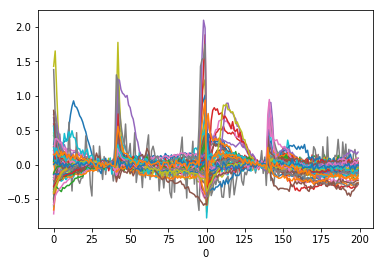

In [7]:
df.T.plot(legend=False)

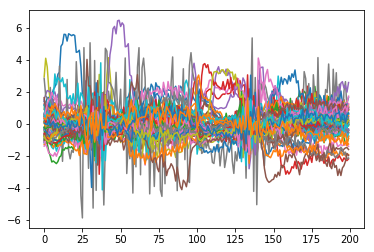

In [8]:
norm_df.T.plot(legend=False)

In [9]:
# https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
from sklearn.decomposition import PCA

In [10]:
pca = PCA(n_components=2)

In [11]:
principalComponents = pca.fit_transform(norm_df)

In [12]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

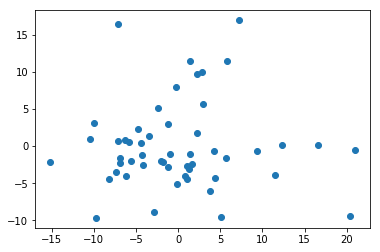

In [13]:
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])

In [14]:
principalDf

,principal component 1,principal component 2
0,7.265877,16.910526
1,12.291371,0.128286
2,3.744619,-6.005870
3,20.950693,-0.520963
4,1.474945,-1.111460
5,5.677148,-1.652090
6,16.587751,0.128378
7,2.250498,1.717393
8,5.102147,-9.572251
9,1.645740,-2.371958


[[ -5.71078186  -0.79570576]
 [ 11.03933363  -1.47673887]
 [  2.51136031   9.34206717]
 [ -2.97113363   2.95734844]
 [  0.12970043  -2.80223183]
 [ 20.40478511  -9.40413144]
 [ -7.83137339  -5.3929348 ]
 [ -7.12441529  16.42780251]
 [ 18.76922221  -0.19629254]
 [  7.26587717  16.91052641]
 [-15.12505141  -2.13802369]
 [  4.42338271  -7.78906077]
 [ -2.88817767  -8.82062504]
 [  4.14118423  -1.21854442]
 [-10.24438365   1.98769832]]
[ 9  1 11  8  4 13  8 13 11  4  2  0  6  0  2  1 13  6  6  3 10  3  4  2
  7 13 14  2  0  4  0 12  3  0  4  5  6  4  2  0  4  1  4  4  0 14  0  4
  4  3  0  2]


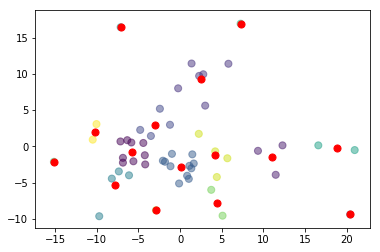

In [34]:
# https://datatofish.com/k-means-clustering-python/
nc = 15
kmeans = KMeans(n_clusters=nc).fit(principalDf)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
print(centroids)
print(labels)

plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)

In [16]:
labels

array([12,  0, 10,  3, 13,  6,  3,  6, 10, 13,  2,  5,  5,  5,  2,  0, 10,
        9,  5,  8,  4,  8,  1,  2,  7,  6, 14,  2,  1, 13,  8,  9,  8,  5,
       13, 11,  5, 13,  2,  8, 13,  0,  1,  1,  5, 14,  1,  1, 13,  8,  8,
        2])

In [17]:
l = []
for i in range(nc):
    temp = []
    for j in range(len(labels)):
        if labels[j] == i:
            temp += [j + 1]
    l += [temp]
l

[[2, 16, 42],
 [23, 29, 43, 44, 47, 48],
 [11, 15, 24, 28, 39, 52],
 [4, 7],
 [21],
 [12, 13, 14, 19, 34, 37, 45],
 [6, 8, 26],
 [25],
 [20, 22, 31, 33, 40, 50, 51],
 [18, 32],
 [3, 9, 17],
 [36],
 [1],
 [5, 10, 30, 35, 38, 41, 49],
 [27, 46]]

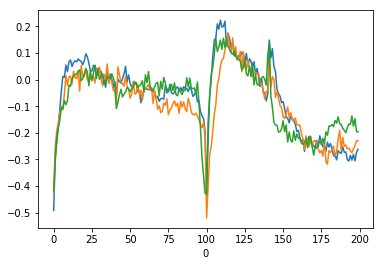

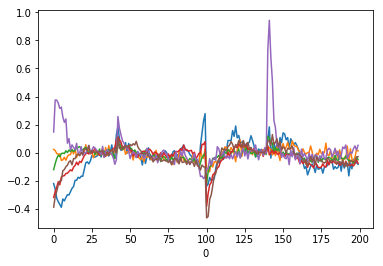

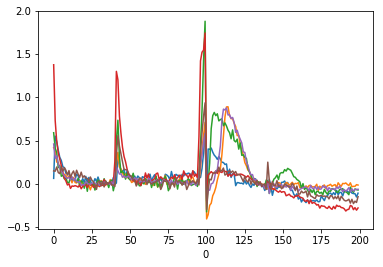

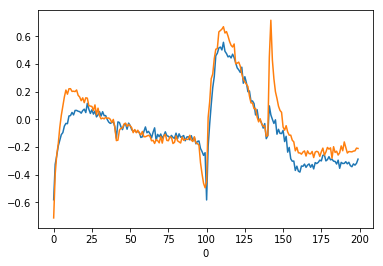

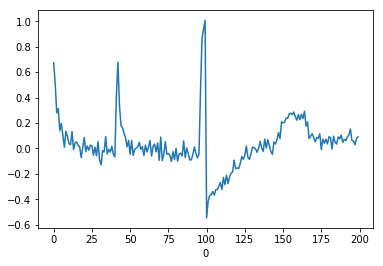

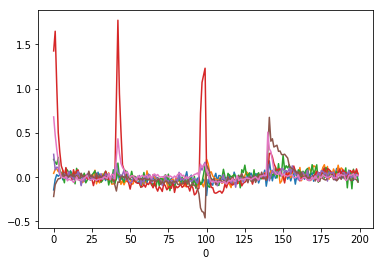

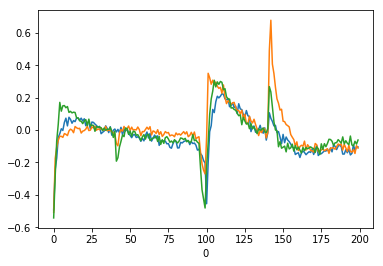

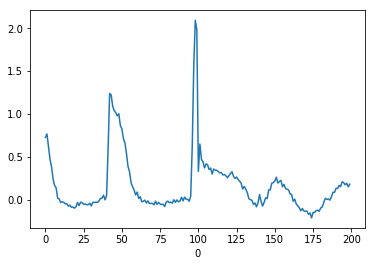

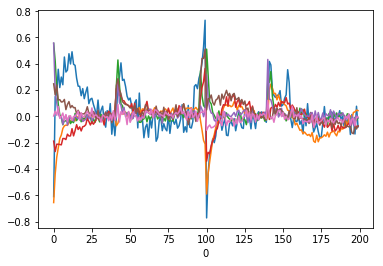

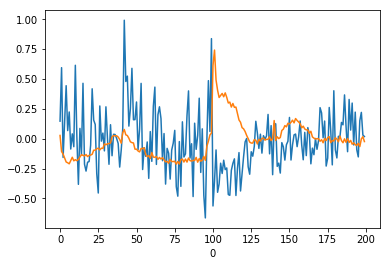

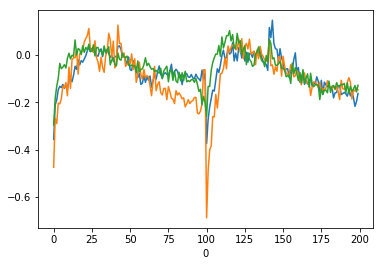

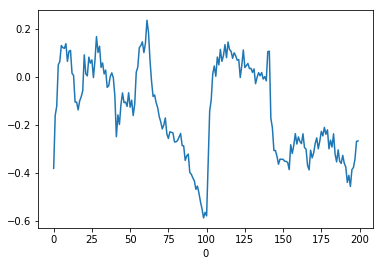

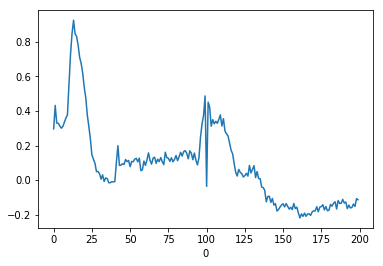

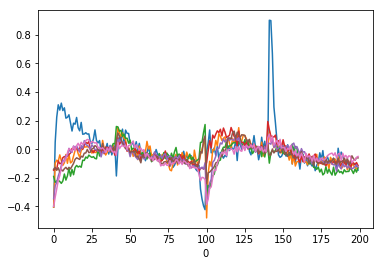

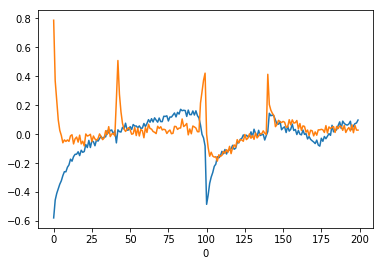

In [18]:
d = df
for i in range(nc):
    df1 = d.T[l[i]]
    df1.plot(legend=False)